### Task 1 


 *  Naive Bayesis a probabilistic classifier based on Bayes' theorem, assuming that each feature contributes independently to the probability of a class.\textbf{Gaussian Naive Bayes} is used when the data is normally distributed. It is assumed that the data
follows a normal distribution.
 *  K-Nearest Neighbors (KNN) is a non-parametric algorithm that classifies new cases based on the majority class of their kk closest neighbors. It assumes similar data points are near each other, and the optimal value of kk, which affects accuracy, can be tuned through methods like \textbf{GridSearchCV}.
* Ensemble Learning (EL)combines multiple models strategically to enhance predictive performance beyond the capabilities of individual models. We will explore techniques such as  Bagging, which reduces variance by averaging predictions from base classifiers trained on random subsets of the data, and Random Forest , which further improves accuracy by averaging predictions from numerous decision trees fitted on different samples. AdaBoost focuses on transforming weak classifiers into strong ones by iteratively giving more weight to misclassified instances, while Gradient Boosting builds an ensemble of weak models in a stage-wise manner, optimizing performance by minimizing errors at each step.
* Support Vector Machine (SVM) is an algorithm that plots data points in an n-dimensional space, where each feature represents a coordinate. It classifies data by finding the optimal hyperplane that best separates the classes.

#### Task 2 Data Preprocessing 

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Scikit-learn modules
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, classification_report, 
    roc_curve, auc, average_precision_score, precision_recall_curve
)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Imbalanced-learn module
from imblearn.over_sampling import SMOTE

# Plotting tools
from sklearn.metrics import PrecisionRecallDisplay


In [2]:
import pandas as pd

train_data = pd.read_csv('dataset/Train.csv')
test_data = pd.read_csv('dataset/Test.csv')


print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

Training Data:
   Trip  VehicleSpeed_km_h_  Battery_Status
0  1567                7.76               0
1  1567                4.91               0
2  1567                3.47               0
3  1567                3.47               0
4  1567                0.00               0

Testing Data:
   Trip  VehicleSpeed_km_h_  Battery_Status
0  1558           53.590000               0
1  1558           51.980000               0
2  1558           50.369999               0
3  1558           50.369999               1
4  1558           49.799999               1


In [3]:
print(train_data.shape)
print(test_data.shape)

(107085, 3)
(60172, 3)


In [4]:
train_data.head()

,Trip,VehicleSpeed_km_h_,Battery_Status
0,1567,7.76,0
1,1567,4.91,0
2,1567,3.47,0
3,1567,3.47,0
4,1567,0.00,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107085 entries, 0 to 107084
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Trip                107085 non-null  int64  
 1   VehicleSpeed_km_h_  107085 non-null  float64
 2   Battery_Status      107085 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 MB


In [6]:


if 'Battery_Status' in train_data.columns:
    train_counts = train_data['Battery_Status'].value_counts().sort_index()
    train_percentages = train_data['Battery_Status'].value_counts(normalize=True).sort_index() * 100

    print(f"\nTraining Dataset:")
    print("=" * 40)
    print(f"{'Status':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 40)
    for status in train_counts.index:
        print(f"{status:<10}{train_counts[status]:<10}{train_percentages[status]:.2f}%")
    print("=" * 40)
    print(f"Total: {len(train_data)} samples")


    test_counts = test_data['Battery_Status'].value_counts().sort_index()
    test_percentages = test_data['Battery_Status'].value_counts(normalize=True).sort_index() * 100
else:
    print("Column 'Battery_Status' not found in the training data.")

print(f"\nTesting Dataset:")
print("=" * 40)
print(f"{'Status':<10}{'Count':<10}{'Percentage':<10}")
print("-" * 40)
for status in test_counts.index:
    print(f"{status:<10}{test_counts[status]:<10}{test_percentages[status]:.2f}%")
print("=" * 40)
print(f"Total: {len(test_data)} samples")

# Check for missing values
print("Missing values in the dataset:\n", train_data.isnull().sum())

# Check for missing values
print("Missing values in the dataset:\n", test_data.isnull().sum())



Training Dataset:
Status    Count     Percentage
----------------------------------------
0         78773     73.56%
1         28312     26.44%
Total: 107085 samples

Testing Dataset:
Status    Count     Percentage
----------------------------------------
0         44687     74.27%
1         15485     25.73%
Total: 60172 samples
Missing values in the dataset:
 Trip                  0
VehicleSpeed_km_h_    0
Battery_Status        0
dtype: int64
Missing values in the dataset:
 Trip                  0
VehicleSpeed_km_h_    0
Battery_Status        0
dtype: int64


The models that we will be using are:
Naive Bayes Classifier
K-Nearest Neighbors Classifier
Ensemble Learning Classifier
Support Vector Machine Classifier

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [18]:


if 'Battery_Status' in train_data.columns:

    X_train = train_data.drop('Battery_Status', axis=1)
    y_train = train_data['Battery_Status']
    
    # Prepare the test data
    X_test = test_data.drop('Battery_Status', axis=1)
    y_test = test_data['Battery_Status']

    # Scale the training and test data using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nScaled Training Dataset:")
    print("=" * 40)
    print(f"{'Feature':<20}{'Min':<10}{'Max':<10}")
    print("-" * 40)
    for i, col in enumerate(X_train.columns):
        print(f"{col:<20}{X_train_scaled[:, i].min():<10.2f}{X_train_scaled[:, i].max():<10.2f}")
    print("=" * 40)
    print(f"Total: {len(X_train_scaled)} samples")

    smote = SMOTE(random_state=42) 
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    print("\nResampled Training Dataset (After SMOTE):")
    print("=" * 40)
    print(f"{'Status':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 40)
    for status in pd.Series(y_train_resampled).value_counts().index:
        print(f"{status:<10}{pd.Series(y_train_resampled).value_counts()[status]:<10}{pd.Series(y_train_resampled).value_counts(normalize=True)[status]*100:.2f}%")
    print("=" * 40)
    print(f"Total: {len(X_train_resampled)} samples")

    print("\nTest Dataset:")
    print("=" * 40)
    print(f"{'Status':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 40)
    for status in test_data['Battery_Status'].value_counts().index:
        print(f"{status:<10}{test_data['Battery_Status'].value_counts()[status]:<10}{test_data['Battery_Status'].value_counts(normalize=True)[status]*100:.2f}%")
    print("=" * 40)
    print(f"Total: {len(test_data)} samples")





Scaled Training Dataset:
Feature             Min       Max       
----------------------------------------
Trip                0.00      1.00      
VehicleSpeed_km_h_  0.00      1.00      
Total: 107085 samples

Resampled Training Dataset (After SMOTE):
Status    Count     Percentage
----------------------------------------
0         78773     50.00%
1         78773     50.00%
Total: 157546 samples

Test Dataset:
Status    Count     Percentage
----------------------------------------
0         44687     74.27%
1         15485     25.73%
Total: 60172 samples


#### Naive Bayes

Gaussian Naive Bayes Results:
Test Accuracy: 0.6181

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.58      0.69     44687
           1       0.37      0.72      0.49     15485

    accuracy                           0.62     60172
   macro avg       0.61      0.65      0.59     60172
weighted avg       0.73      0.62      0.64     60172

              precision    recall  f1-score   support

           0       0.86      0.58      0.69     44687
           1       0.37      0.72      0.49     15485

    accuracy                           0.62     60172
   macro avg       0.61      0.65      0.59     60172
weighted avg       0.73      0.62      0.64     60172



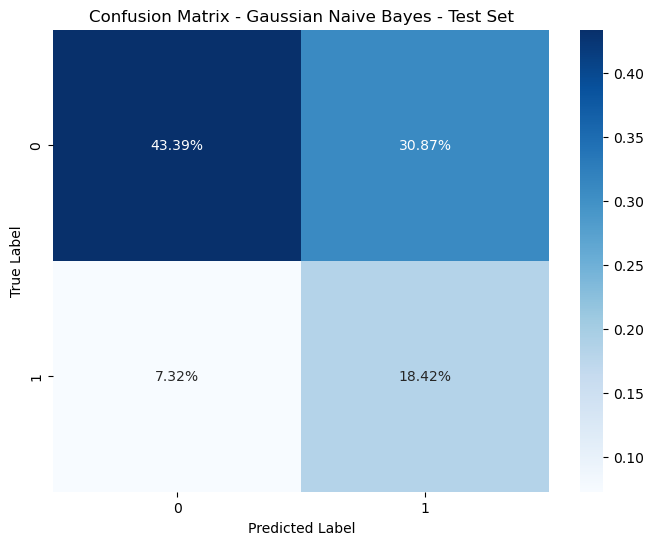

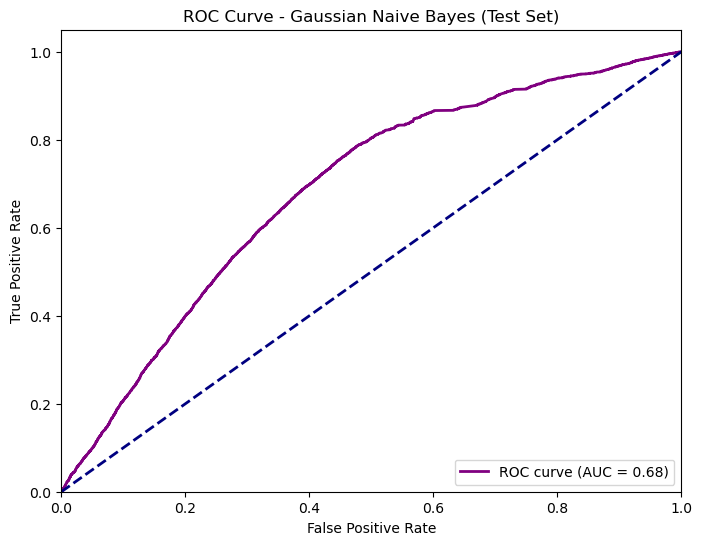

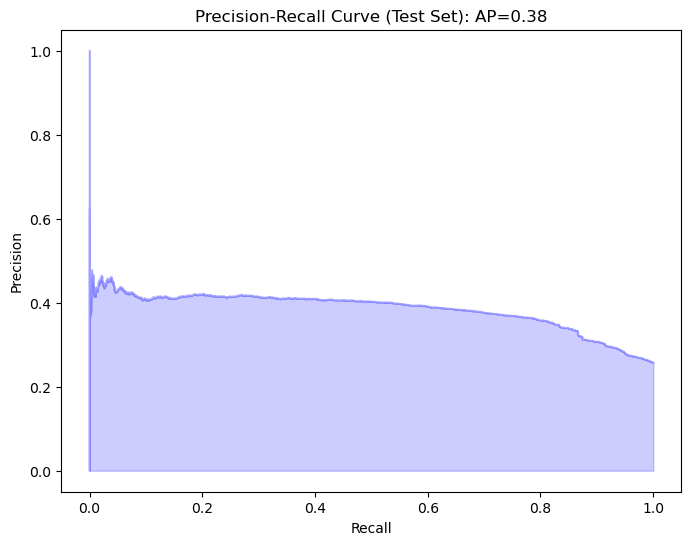

In [23]:
#initialise the model
gnb = GaussianNB()
#fit the data
gnb.fit(X_train_resampled, y_train_resampled)
## Predict class labels for the scaled test dataset
y_pred_test = gnb.predict(X_test_scaled)
# Predict probabilities for the positive class (class 1)
y_pred_proba_test = gnb.predict_proba(X_test_scaled)[:, 1]

#calculate accuracies, confusion matrix and classification report
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Gaussian Naive Bayes Results:")
print("============================")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(class_report)

print(classification_report(y_test,  y_pred_test))

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test,  y_pred_test)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title(f'Confusion Matrix - Gaussian Naive Bayes - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve for Test Set
fpr_test, tpr_test, treshold = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_test)
average_precision = average_precision_score(y_test, y_pred_proba_test)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP={average_precision:.2f}')
plt.show()

### KNN

Fitting 5 folds for each of 97 candidates, totalling 485 fits

Best k value: 3
Best accuracy from Grid Search: 0.4200
Test Accuracy: 0.6183

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.68      0.73     44687
           1       0.32      0.43      0.37     15485

    accuracy                           0.62     60172
   macro avg       0.55      0.56      0.55     60172
weighted avg       0.66      0.62      0.63     60172



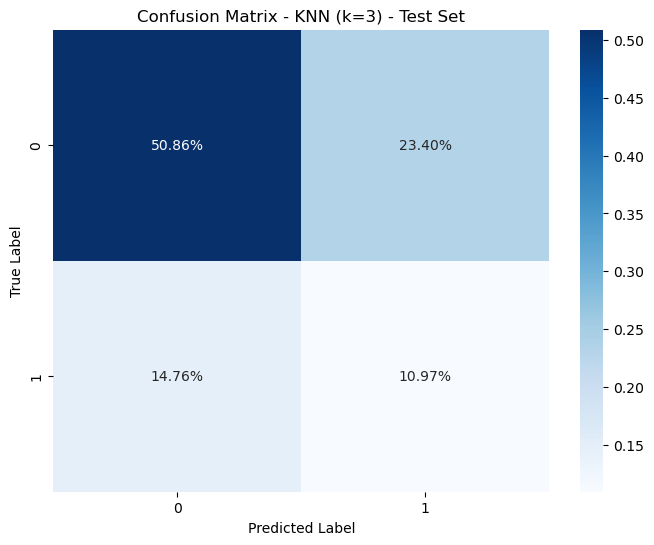

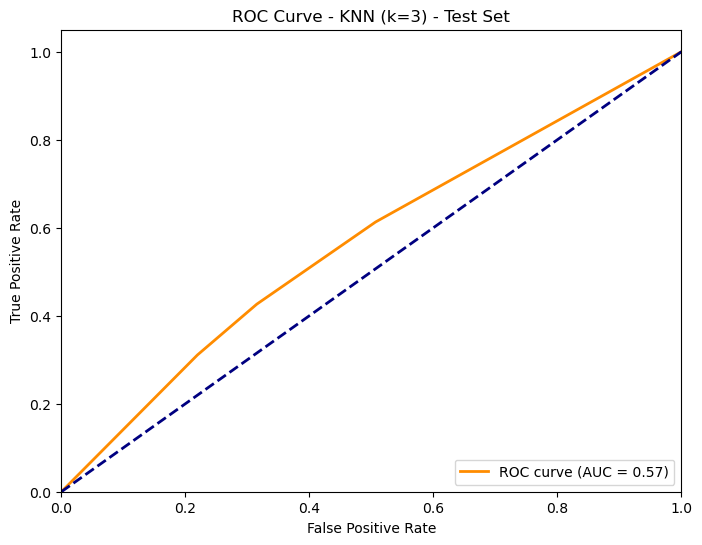

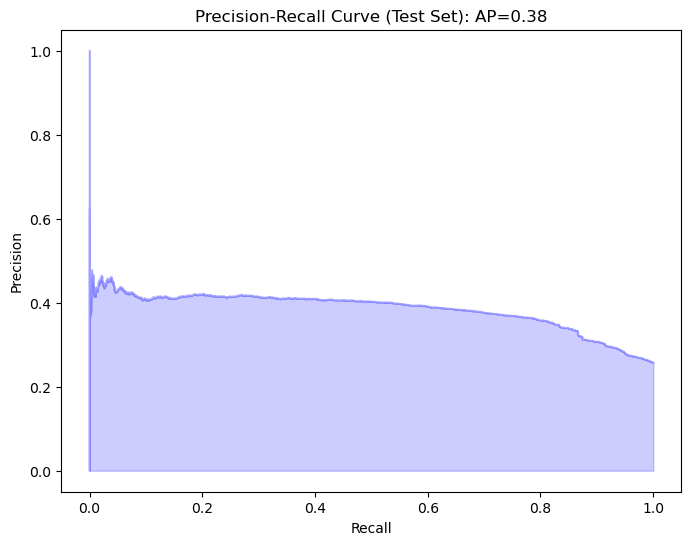


Final Results for Best KNN Model:
Best k value: 3
Test Accuracy: 0.6183


In [22]:
# Define a range of k values to test 
k_values = list(range(3, 100))

# Create a parameter grid for GridSearchCV with the k values
param_grid = {'n_neighbors': k_values}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Set up cross-validation strategy with stratified k-fold
cv = StratifiedKFold(n_splits=5)

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)


grid_search.fit(X_train_resampled, y_train_resampled)


best_k = grid_search.best_params_['n_neighbors']


best_knn = grid_search.best_estimator_

print(f"\nBest k value: {best_k}")
print(f"Best accuracy from Grid Search: {grid_search.best_score_:.4f}")


y_pred_knn_test = best_knn.predict(X_test_scaled)

# Predict probabilities for the positive class (class 1) using the best KNN model
y_pred_proba_knn_test = best_knn.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_knn_test)


print(f"Test Accuracy: {test_accuracy:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_knn_test))


plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_knn_test)
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title(f'Confusion Matrix - KNN (k={best_k}) - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr, tpr, treshold = roc_curve(y_test, y_pred_proba_knn_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - KNN (k={best_k}) - Test Set')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_test)
average_precision = average_precision_score(y_test, y_pred_proba_test)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP={average_precision:.2f}')
plt.show()

print("\nFinal Results for Best KNN Model:")
print("================================")
print(f"Best k value: {best_k}")
print(f"Test Accuracy: {test_accuracy:.4f}")


### Bagging Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters: {'n_estimators': 10, 'max_samples': 0.9, 'max_features': 0.7}
Best accuracy from RandomGrid Search: 0.5796
Test Accuracy: 0.6126

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.65      0.71     44687
           1       0.33      0.51      0.40     15485

    accuracy                           0.61     60172
   macro avg       0.56      0.58      0.56     60172
weighted avg       0.67      0.61      0.63     60172



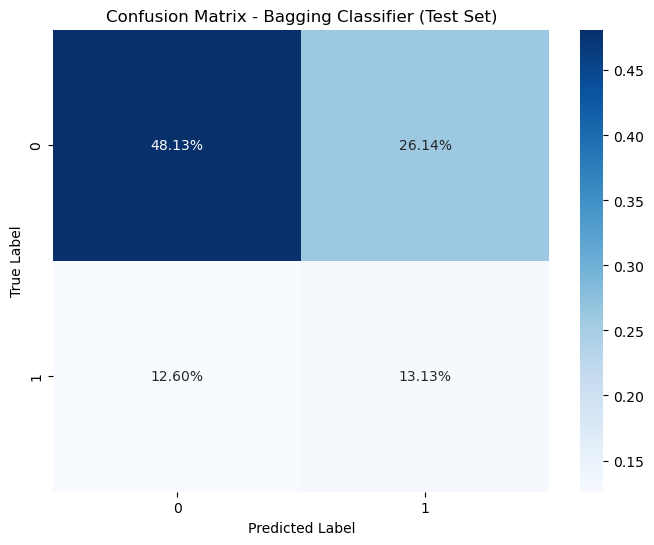

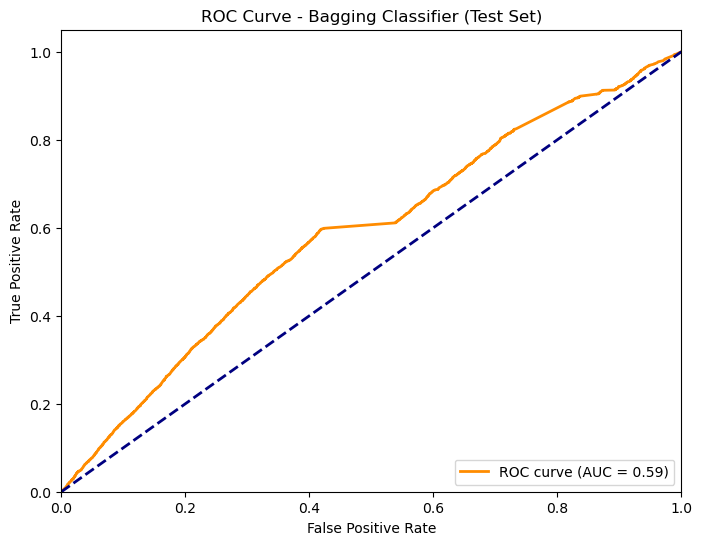

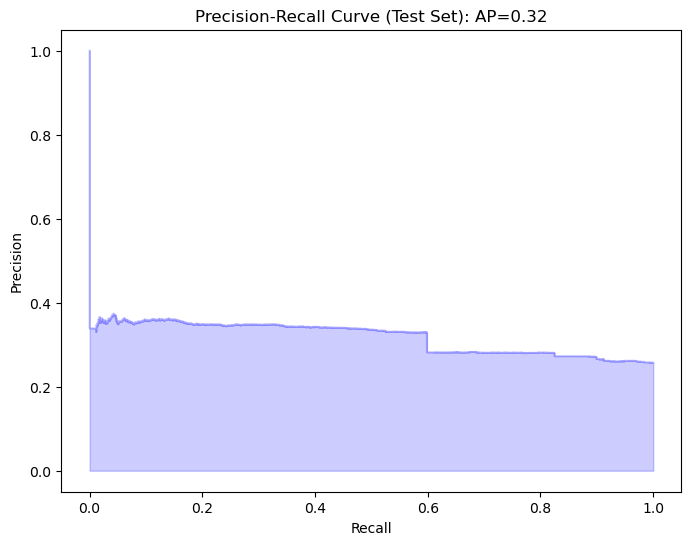


Final Results for Best Bagging Classifier:
Best parameters: {'n_estimators': 10, 'max_samples': 0.9, 'max_features': 0.7}
Test Accuracy: 0.6126


In [11]:


param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_samples': [0.1, 0.5, 0.7, 0.9],
    'max_features': [0.1, 0.5, 0.7, 0.9]
}


bagging = BaggingClassifier(random_state=42)

grid_search = RandomizedSearchCV(
    estimator=bagging,
    param_distributions=param_grid,
    scoring='balanced_accuracy',
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_resampled, y_train_resampled)


best_params = grid_search.best_params_
best_bagging = grid_search.best_estimator_
print("\nBest parameters:", best_params)
print(f"Best accuracy from RandomGrid Search: {grid_search.best_score_:.4f}")


y_pred_bagging_test = best_bagging.predict(X_test_scaled)
y_pred_proba_bagging_test = best_bagging.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_bagging_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_bagging_test))


plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_bagging_test)
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Bagging Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr, tpr, treshold = roc_curve(y_test, y_pred_proba_bagging_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for Test Set
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_bagging_test)
average_precision = average_precision_score(y_test, y_pred_proba_bagging_test)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP={average_precision:.2f}')
plt.show()

print("\nFinal Results for Best Bagging Classifier:")
print("=========================================")
print("Best parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.4f}")


bagging_predictions = {
    'y_true_test': y_test,
    'y_pred_test': y_pred_bagging_test,
    'y_pred_proba_test': y_pred_proba_bagging_test
}



### Random Forest Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Best accuracy from Randomized Search: 0.4301
Test Accuracy: 0.5667

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.56      0.66     44687
           1       0.31      0.57      0.41     15485

    accuracy                           0.57     60172
   macro avg       0.55      0.57      0.53     60172
weighted avg       0.67      0.57      0.59     60172



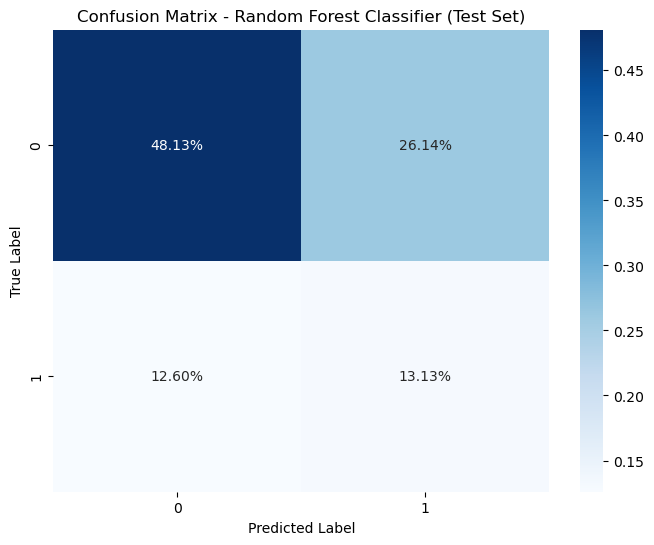

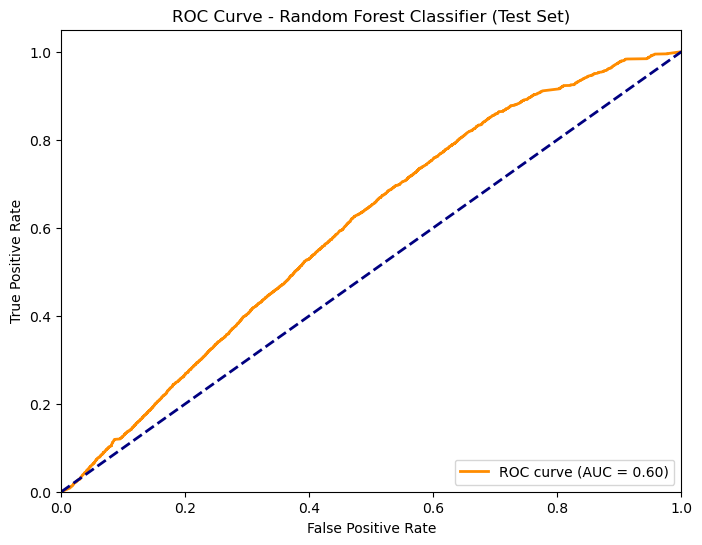

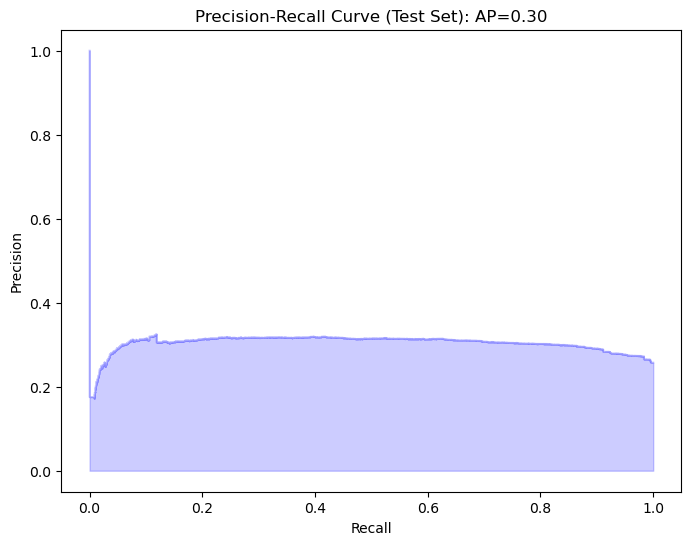


Final Results for Best Random Forest Classifier:
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Test Accuracy: 0.5667


In [12]:

#parameters to fine-tune the RandomForestClassifier
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_forest = RandomForestClassifier(random_state=42)

#apply the parameters and use the RandomizedSeearchCV
grid_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid_rf,
    scoring='balanced_accuracy',
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search_rf.fit(X_train_resampled, y_train_resampled)

best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_
print("\nBest parameters for Random Forest:", best_params_rf)
print(f"Best accuracy from Randomized Search: {grid_search_rf.best_score_:.4f}")


y_pred_rf_test = best_rf.predict(X_test_scaled)
y_pred_proba_rf_test = best_rf.predict_proba(X_test_scaled)[:, 1]


test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
print(f"Test Accuracy: {test_accuracy_rf:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_rf_test))


plt.figure(figsize=(8, 6))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr_rf, tpr_rf, treshold  = roc_curve(y_test, y_pred_proba_rf_test)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()


plt.figure(figsize=(8, 6))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf_test)
average_precision_rf = average_precision_score(y_test, y_pred_proba_rf_test)
plt.step(recall_rf, precision_rf, color='b', alpha=0.2, where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP={average_precision_rf:.2f}')
plt.show()

print("\nFinal Results for Best Random Forest Classifier:")
print("=========================================")
print("Best parameters:", best_params_rf)
print(f"Test Accuracy: {test_accuracy_rf:.4f}")



#### Ada boost 


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent


Best parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.01}
Best cross-validated balanced accuracy: 0.3963
Test Accuracy: 0.6589

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     44687
           1       0.39      0.61      0.48     15485

    accuracy                           0.66     60172
   macro avg       0.61      0.64      0.61     60172
weighted avg       0.72      0.66      0.68     60172



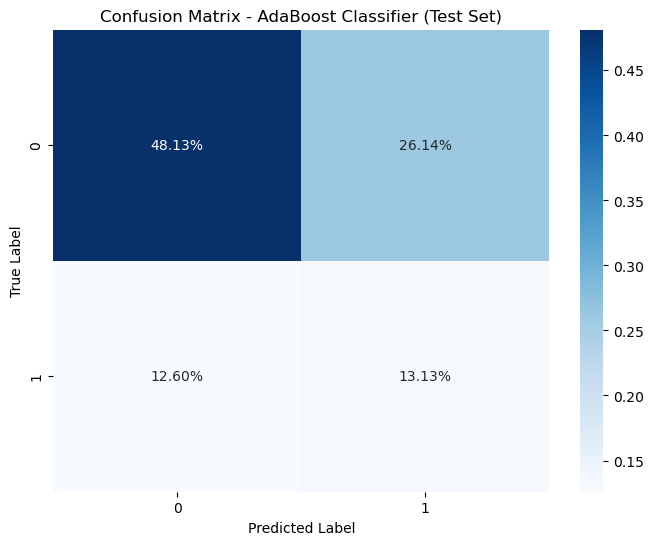

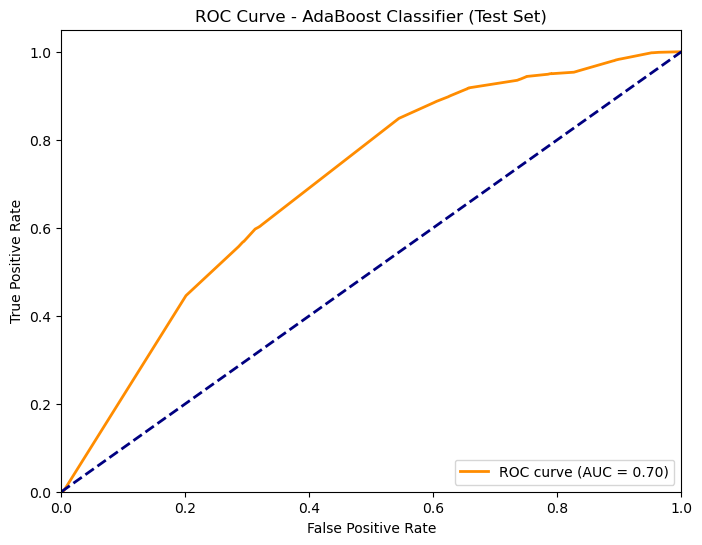

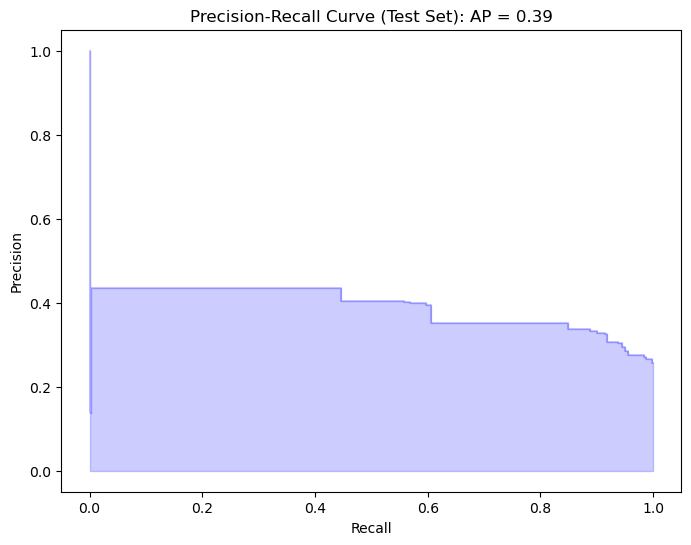


Final Results for Best AdaBoost Classifier:
Best parameters: {'n_estimators': 50, 'learning_rate': 0.01}
Test Accuracy: 0.6589


In [13]:

# weak estimator 
base_estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

#booster
ada_boost = AdaBoostClassifier(estimator=base_estimator, random_state=42)


#parameters for the randomized search
param_grid_ada = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5]
}


grid_search_ada = RandomizedSearchCV(
    estimator=ada_boost,
    param_distributions=param_grid_ada,
    scoring='balanced_accuracy',
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


grid_search_ada.fit(X_train_resampled, y_train_resampled)

best_params_ada = grid_search_ada.best_params_
best_ada = grid_search_ada.best_estimator_
print("\nBest parameters for AdaBoost:", best_params_ada)
print(f"Best cross-validated balanced accuracy: {grid_search_ada.best_score_:.4f}")

y_pred_ada_test = best_ada.predict(X_test_scaled)
y_pred_proba_ada_test = best_ada.predict_proba(X_test_scaled)[:, 1]


test_accuracy_ada = accuracy_score(y_test, y_pred_ada_test)
print(f"Test Accuracy: {test_accuracy_ada:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_ada_test))

plt.figure(figsize=(8, 6))
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada_test)
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr_ada, tpr_ada,treshold = roc_curve(y_test, y_pred_proba_ada_test)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()


precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_pred_proba_ada_test)
average_precision_ada = average_precision_score(y_test, y_pred_proba_ada_test)

plt.figure(figsize=(8, 6))
plt.step(recall_ada, precision_ada, color='b', alpha=0.2, where='post')
plt.fill_between(recall_ada, precision_ada, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP = {average_precision_ada:.2f}')
plt.show()


print("\nFinal Results for Best AdaBoost Classifier:")
print("=========================================")
print("Best parameters:", best_params_ada)
print(f"Test Accuracy: {test_accuracy_ada:.4f}")




### SVM (LinearSVC)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: Conv


Best parameters for Linear SVM: {'max_iter': 1000, 'loss': 'hinge', 'C': 1000}
Best cross-validated balanced accuracy: 0.5007
Test Accuracy: 0.7427

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     44687
           1       0.00      0.00      0.00     15485

    accuracy                           0.74     60172
   macro avg       0.37      0.50      0.43     60172
weighted avg       0.55      0.74      0.63     60172



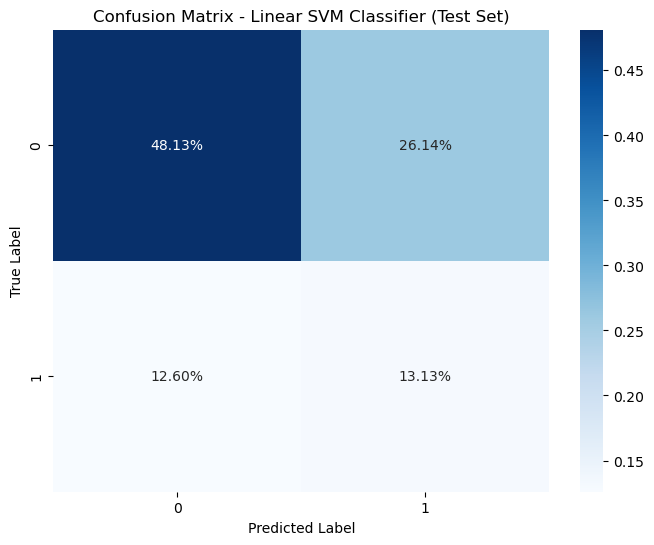

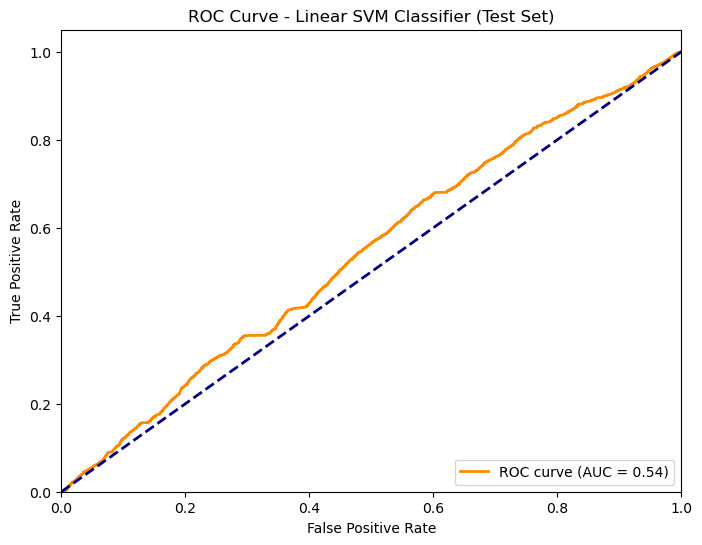

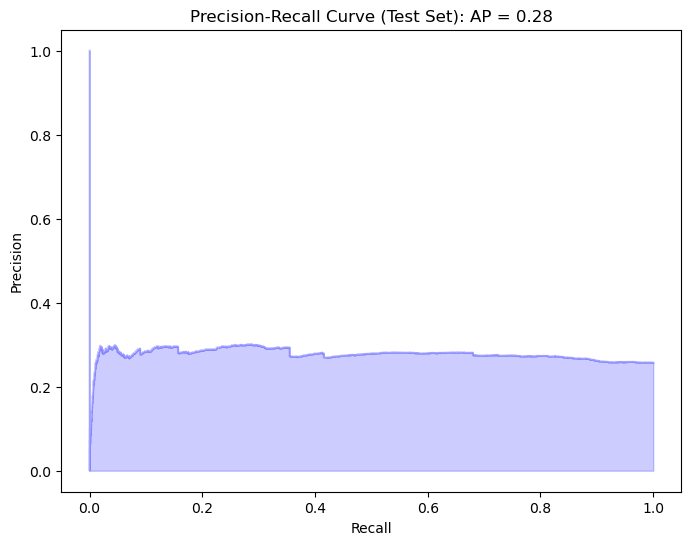


Final Results for Best Linear SVM Classifier:
Best parameters: {'max_iter': 1000, 'loss': 'hinge', 'C': 1000}
Test Accuracy: 0.7427


In [16]:

base_svm = LinearSVC(random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],  
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 2000],  
}


grid_search_svm = RandomizedSearchCV(
    estimator=base_svm,
    param_distributions=param_grid_svm,
    scoring='balanced_accuracy',
    n_iter=20,  
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

grid_search_svm.fit(X_train_resampled, y_train_resampled)

best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

print("\nBest parameters for Linear SVM:", best_params_svm)
print(f"Best cross-validated balanced accuracy: {grid_search_svm.best_score_:.4f}")


y_pred_svm_test = best_svm.predict(X_test_scaled)
y_pred_proba_svm_test = best_svm.decision_function(X_test_scaled) 


test_accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
print(f"Test Accuracy: {test_accuracy_svm:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_svm_test))

plt.figure(figsize=(8, 6))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_test)
sns.heatmap(conf_matrix / np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Linear SVM Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

fpr_svm, tpr_svm, thresholds= roc_curve(y_test, y_pred_proba_svm_test)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()


precision_svm, recall_svm, thresholds_pr_svm = precision_recall_curve(y_test, y_pred_proba_svm_test)
average_precision_svm = average_precision_score(y_test, y_pred_proba_svm_test)

plt.figure(figsize=(8, 6))
plt.step(recall_svm, precision_svm, color='b', alpha=0.2, where='post')
plt.fill_between(recall_svm, precision_svm, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP = {average_precision_svm:.2f}')
plt.show()


print("\nFinal Results for Best Linear SVM Classifier:")
print("=========================================")
print("Best parameters:", best_params_svm)
print(f"Test Accuracy: {test_accuracy_svm:.4f}")



AdaBoost provides a good trade-off between general accuracy and performance on the minority class, making it the most balanced option in this case. 

#### Task 2 Recurrent Neural Networks

Develop recurrent neural network(s) to classify the sequential data - first we need to make our classification data into sequential.
The network(s) can be obtained by using simple RNN, LSTM, GRU and bi-directional
recurrent network.

### RNN

In [9]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_curve, auc, precision_recall_curve, average_precision_score
)

# Imbalanced-learn module
from imblearn.over_sampling import BorderlineSMOTE

# TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.losses import binary_crossentropy

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [1]:


train_data = pd.read_csv('dataset/Train.csv')
test_data = pd.read_csv('dataset/Test.csv')


print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

Training Data:
   Trip  VehicleSpeed_km_h_  Battery_Status
0  1567                7.76               0
1  1567                4.91               0
2  1567                3.47               0
3  1567                3.47               0
4  1567                0.00               0

Testing Data:
   Trip  VehicleSpeed_km_h_  Battery_Status
0  1558           53.590000               0
1  1558           51.980000               0
2  1558           50.369999               0
3  1558           50.369999               1
4  1558           49.799999               1


Sliding window method inspiration - https://www.youtube.com/watch?v=-v0zB69nh-c 
https://www.geeksforgeeks.org/window-sliding-technique/

In [2]:

X_train = train_data.drop('Battery_Status', axis=1)
y_train = train_data['Battery_Status']

X_test = test_data.drop('Battery_Status', axis=1)
y_test = test_data['Battery_Status']


scaler = MinMaxScaler()
sequence_length = 20


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df['Trip'] = train_data['Trip'].values
X_train_df['Battery_Status'] = y_train.values

X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_df['Trip'] = test_data['Trip'].values
X_test_df['Battery_Status'] = y_test.values

# Create sequences using the sliding window method
def create_sequences(df, sequence_length):
    X_seq = []
    y_seq = []
    for trip_id in df['Trip'].unique():
        trip_mask = df['Trip'] == trip_id
        trip_speed = df[trip_mask]['VehicleSpeed_km_h_'].values
        trip_battery = df[trip_mask]['Battery_Status'].values
        
        for i in range(sequence_length, len(trip_speed)):
            X_seq.append(trip_speed[i-sequence_length:i])
            y_seq.append(trip_battery[i])
    
    return np.array(X_seq), np.array(y_seq)

# Sequences for the train and test
X_train_seq, y_train_seq = create_sequences(X_train_df, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_df, sequence_length)

# Reshape X sequences to be [samples, time steps, features]
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], 1))
if X_test_seq.size > 0:
    X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], 1))

# Apply BorderlineSMOTE to the training sequences (flatten the 3D array to 2D)
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')

# flatten for SMOTE
X_train_seq_flat = X_train_seq.reshape(X_train_seq.shape[0], -1)

# apply SMOTE on the flattened data
X_train_seq_balanced_flat, y_train_seq_balanced = borderline_smote.fit_resample(X_train_seq_flat, y_train_seq)

# reshape to 3d
X_train_seq_balanced = X_train_seq_balanced_flat.reshape(
    X_train_seq_balanced_flat.shape[0], sequence_length, 1
)


print("\nSequence shapes:")
print(f"X_train shape: {X_train_seq_balanced.shape}")
print(f"y_train shape: {y_train_seq_balanced.shape}")
print(f"X_test shape: {X_test_seq.shape}")
print(f"y_test shape: {y_test_seq.shape}")


print("\nClass distributions:")
print("\nTraining set (after balancing):")
print(pd.Series(y_train_seq_balanced).value_counts(normalize=True).mul(100).round(2))
print("\nTest set:")
print(pd.Series(y_test_seq).value_counts(normalize=True).mul(100).round(2))




Sequence shapes:
X_train shape: (153182, 20, 1)
y_train shape: (153182,)
X_test shape: (58872, 20, 1)
y_test shape: (58872,)

Class distributions:

Training set (after balancing):
0    50.0
1    50.0
Name: proportion, dtype: float64

Test set:
0    74.18
1    25.82
Name: proportion, dtype: float64


Inspiration for all our RNNs architectures,technically we used the same approaches except swithcing the model:

https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru 

### Simple RNN

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 20, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,357 (75.61 KB)

 Trainable params: 19,357 (75.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7047 - loss: 0.5591
Epoch 2/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7841 - loss: 0.4671
Epoch 3/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - accuracy: 0.7892 - loss: 0.4574
Epoch 4/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7955 - loss: 0.4482
Epoch 5/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 55s 12ms/step - accuracy: 0.7955 - loss: 0.4454
Epoch 6/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7993 - loss: 0.4392
Epoch 7/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.7997 - loss: 0.4363
Epoch 8/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8017 - loss: 0.4334
Epoch 9/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8043 - loss: 0.4289
Epoch 10/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8032 - loss: 0.4287
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8009 - loss: 0.4254
Test Loss: 0.3942176401615

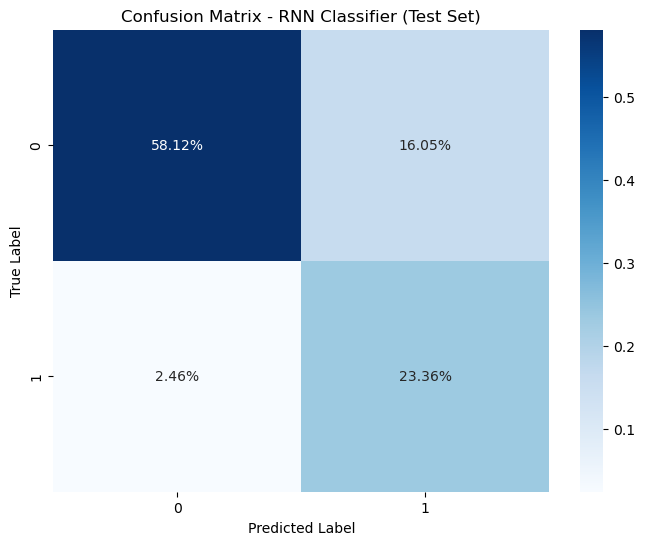

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


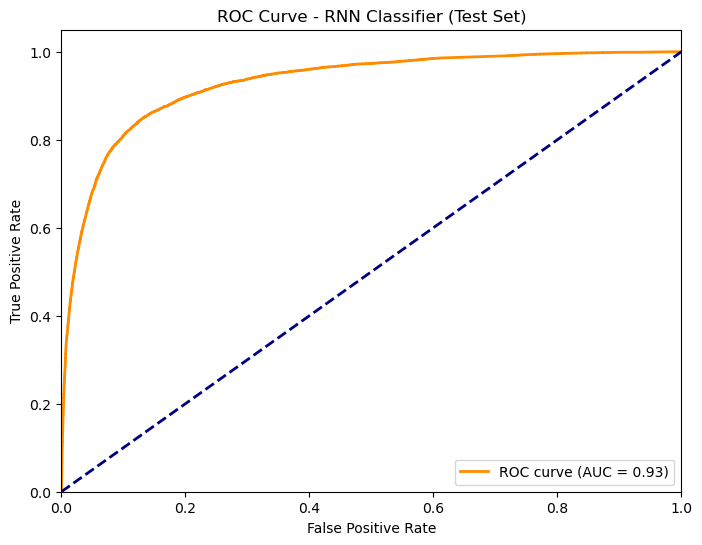

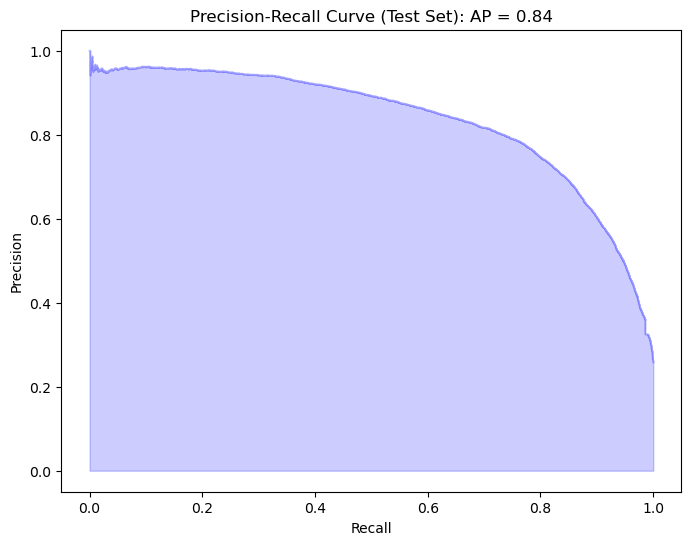


Final Results for RNN Classifier:
Test Accuracy: 0.8149
ROC AUC: 0.9280
Average Precision (AP): 0.8363


In [3]:


model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))  
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) 


model.compile(optimizer='adam', 
              loss=binary_crossentropy,
              metrics=['accuracy'])


model.summary()


history = model.fit(X_train_seq_balanced_flat, y_train_seq_balanced, epochs=10)


test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions into binary
y_pred_rnn_test = model.predict(X_test_seq)  
y_pred_rnn_test = (y_pred_rnn_test > 0.5).astype(int)  


test_accuracy_rnn = accuracy_score(y_test_seq, y_pred_rnn_test)
print(f"Test Accuracy: {test_accuracy_rnn:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test_seq, y_pred_rnn_test))


plt.figure(figsize=(8, 6))
conf_matrix_rnn = confusion_matrix(y_test_seq, y_pred_rnn_test)
sns.heatmap(conf_matrix_rnn/np.sum(conf_matrix_rnn), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - RNN Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


y_pred_proba_rnn_test = model.predict(X_test_seq)  
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test_seq, y_pred_proba_rnn_test)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rnn, tpr_rnn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for Test Set
precision_rnn, recall_rnn, thresholds_pr_rnn = precision_recall_curve(y_test_seq, y_pred_proba_rnn_test)
average_precision_rnn = average_precision_score(y_test_seq, y_pred_proba_rnn_test)

plt.figure(figsize=(8, 6))
plt.step(recall_rnn, precision_rnn, color='b', alpha=0.2, where='post')
plt.fill_between(recall_rnn, precision_rnn, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP = {average_precision_rnn:.2f}')
plt.show()


print("\nFinal Results for RNN Classifier:")
print("=================================")
print(f"Test Accuracy: {test_accuracy_rnn:.4f}")
print(f"ROC AUC: {roc_auc_rnn:.4f}")
print(f"Average Precision (AP): {average_precision_rnn:.4f}")





### LSTM RNN

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,457 (224.44 KB)

 Trainable params: 57,457 (224.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 101s 20ms/step - accuracy: 0.6514 - loss: 0.6161
Epoch 2/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 86s 18ms/step - accuracy: 0.7781 - loss: 0.4733
Epoch 3/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 106s 22ms/step - accuracy: 0.7960 - loss: 0.4465
Epoch 4/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 90s 19ms/step - accuracy: 0.8025 - loss: 0.4347
Epoch 5/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 96s 20ms/step - accuracy: 0.8067 - loss: 0.4300
Epoch 6/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 103s 22ms/step - accuracy: 0.8057 - loss: 0.4291
Epoch 7/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 90s 19ms/step - accuracy: 0.8077 - loss: 0.4252
Epoch 8/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 92s 19ms/step - accuracy: 0.8110 - loss: 0.4208
Epoch 9/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 94s 20ms/step - accuracy: 0.8124 - loss: 0.4148
Epoch 10/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 96s 20ms/step - accuracy: 0.8148 - loss: 0.4081
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7733 - loss: 0.4659
Test Loss: 0.426700

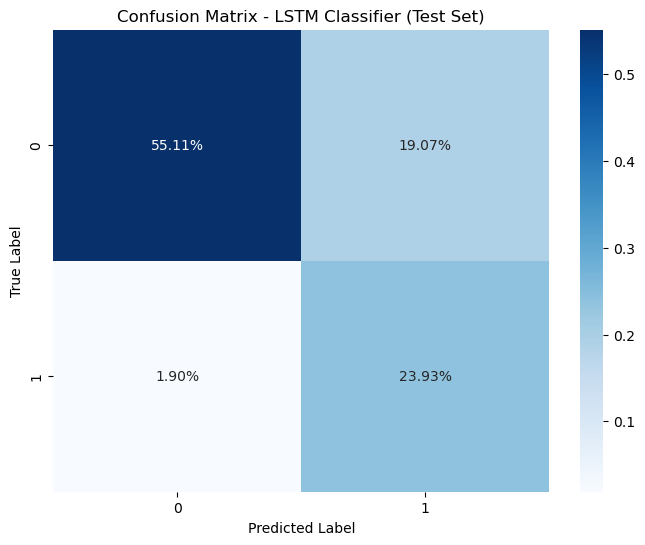

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


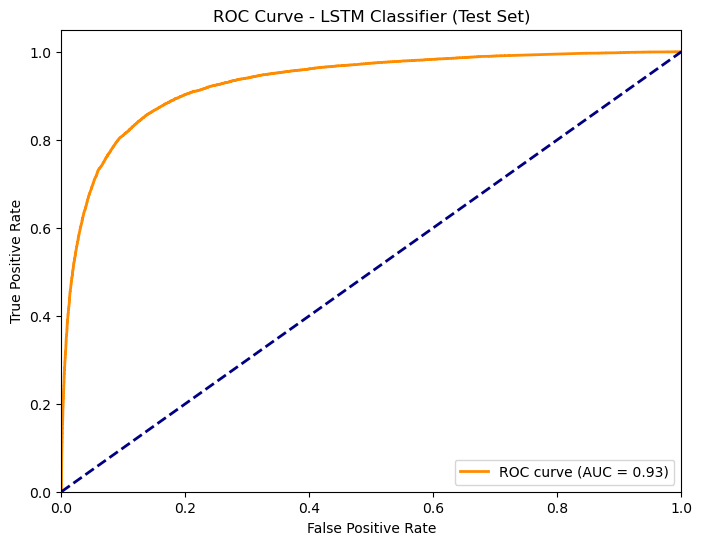

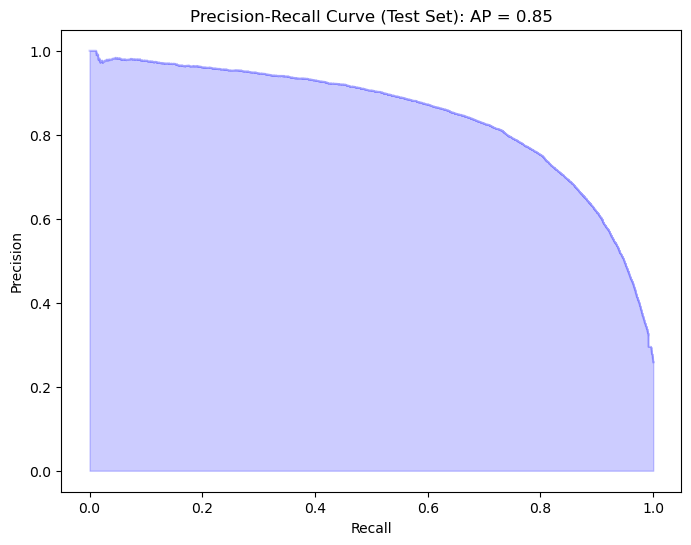


Final Results for LSTM Classifier:
Test Accuracy: 0.7903
ROC AUC: 0.9299
Average Precision (AP): 0.8457


In [4]:


X_train_seq_balanced_flat = X_train_seq_balanced_flat.reshape((X_train_seq_balanced_flat.shape[0], X_train_seq_balanced_flat.shape[1], 1))
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train_seq_balanced_flat.shape[1], X_train_seq_balanced_flat.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  


model.compile(optimizer='adam', 
              loss=binary_crossentropy,
              metrics=['accuracy'])

model.summary()

# Train the model

history = model.fit(X_train_seq_balanced_flat, y_train_seq_balanced, epochs=10)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
 
 #Convert each prediction into binary output

y_pred_lstm_test = model.predict(X_test_seq)  
y_pred_lstm_test = (y_pred_lstm_test > 0.5).astype(int)  


test_accuracy_lstm = accuracy_score(y_test_seq, y_pred_lstm_test)
print(f"Test Accuracy: {test_accuracy_lstm:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test_seq, y_pred_lstm_test))

# Confusion Matrix for Test Set
plt.figure(figsize=(8, 6))
conf_matrix_lstm = confusion_matrix(y_test_seq, y_pred_lstm_test)
sns.heatmap(conf_matrix_lstm/np.sum(conf_matrix_lstm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - LSTM Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve for Test Set
y_pred_proba_lstm_test = model.predict(X_test_seq)  # Get probabilities for the positive class
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test_seq, y_pred_proba_lstm_test)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for Test Set
precision_lstm, recall_lstm, thresholds_pr_lstm = precision_recall_curve(y_test_seq, y_pred_proba_lstm_test)
average_precision_lstm = average_precision_score(y_test_seq, y_pred_proba_lstm_test)

plt.figure(figsize=(8, 6))
plt.step(recall_lstm, precision_lstm, color='b', alpha=0.2, where='post')
plt.fill_between(recall_lstm, precision_lstm, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set): AP = {average_precision_lstm:.2f}')
plt.show()

# Final summary
print("\nFinal Results for LSTM Classifier:")
print("=================================")
print(f"Test Accuracy: {test_accuracy_lstm:.4f}")
print(f"ROC AUC: {roc_auc_lstm:.4f}")
print(f"Average Precision (AP): {average_precision_lstm:.4f}")



### GRU RNN

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 20, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 20, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 20, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 128)            │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,799 (421.09 KB)

 Trainable params: 107,799 (421.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 178s 36ms/step - accuracy: 0.6839 - loss: 0.5777
Epoch 2/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 172s 36ms/step - accuracy: 0.7901 - loss: 0.4524
Epoch 3/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 177s 37ms/step - accuracy: 0.7988 - loss: 0.4402
Epoch 4/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 168s 35ms/step - accuracy: 0.8014 - loss: 0.4330
Epoch 5/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 191s 40ms/step - accuracy: 0.8078 - loss: 0.4239
Epoch 6/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 190s 40ms/step - accuracy: 0.8086 - loss: 0.4221
Epoch 7/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 193s 40ms/step - accuracy: 0.8111 - loss: 0.4157
Epoch 8/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 173s 36ms/step - accuracy: 0.8112 - loss: 0.4133
Epoch 9/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 194s 41ms/step - accuracy: 0.8159 - loss: 0.4071
Epoch 10/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 183s 38ms/step - accuracy: 0.8157 - loss: 0.4040
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8026 - loss: 0.4219
Test Loss:

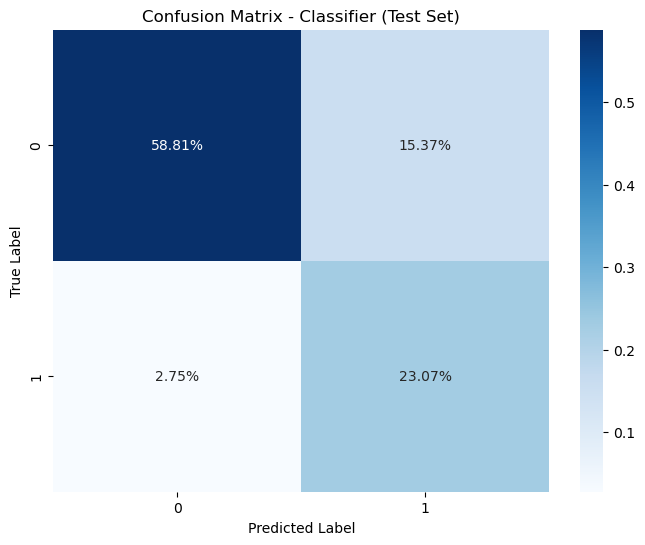

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step


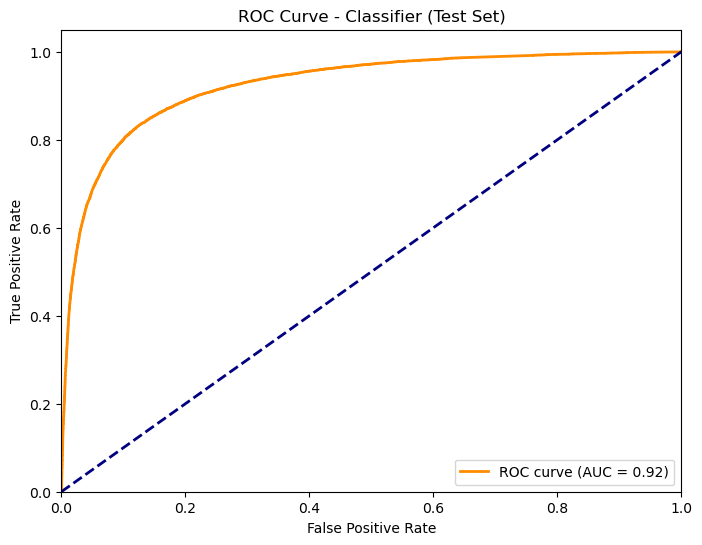

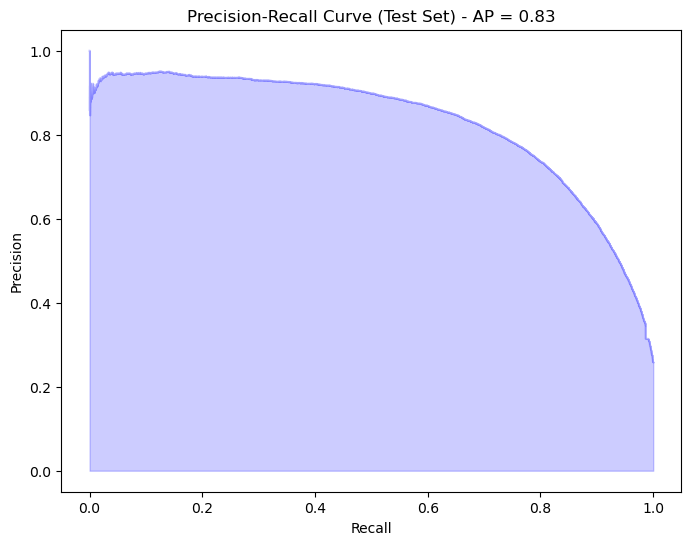


Final Results for Classifier:
Test Accuracy: 0.8188
ROC AUC: 0.9245
Average Precision (AP): 0.8291


In [6]:



X_train_seq_balanced_flat = X_train_seq_balanced_flat.reshape((X_train_seq_balanced_flat.shape[0], X_train_seq_balanced_flat.shape[1], 1))

model = Sequential()
model.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(X_train_seq_balanced_flat.shape[1], X_train_seq_balanced_flat.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='relu', return_sequences=True))  
model.add(GRU(128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))   

# Compile the model
model.compile(optimizer='adam', 
           loss=binary_crossentropy, 
           metrics=['accuracy'])

model.summary()


# Train the model
history = model.fit(X_train_seq_balanced_flat, y_train_seq_balanced, epochs=10)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

 #Convert each prediction into binary output

y_pred_test = model.predict(X_test_seq) 
y_pred_test = (y_pred_test > 0.5).astype(int)  

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_seq, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test_seq, y_pred_test))


plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_seq, y_pred_test)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')  #percentage for easier interpretation
plt.title('Confusion Matrix - Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve for Test Set
y_pred_proba_test = model.predict(X_test_seq)  
fpr, tpr, thresholds = roc_curve(y_test_seq, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()


precision, recall, thresholds_pr = precision_recall_curve(y_test_seq, y_pred_proba_test)
average_precision = average_precision_score(y_test_seq, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set) - AP = {average_precision:.2f}')
plt.show()

# Final summary
print("\nFinal Results for Classifier:")
print("==============================")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")





### Bi-directional RNN

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 20, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 20, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 20, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,657 (604.13 KB)

 Trainable params: 154,657 (604.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 213s 43ms/step - accuracy: 0.6829 - loss: 0.5841
Epoch 2/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 211s 44ms/step - accuracy: 0.7870 - loss: 0.4581
Epoch 3/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 238s 50ms/step - accuracy: 0.7973 - loss: 0.4433
Epoch 4/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 206s 43ms/step - accuracy: 0.8041 - loss: 0.4328
Epoch 5/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 207s 43ms/step - accuracy: 0.8034 - loss: 0.4315
Epoch 6/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 216s 45ms/step - accuracy: 0.8088 - loss: 0.4253
Epoch 7/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 208s 43ms/step - accuracy: 0.8096 - loss: 0.4214
Epoch 8/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 214s 45ms/step - accuracy: 0.8117 - loss: 0.4189
Epoch 9/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 202s 42ms/step - accuracy: 0.8098 - loss: 0.4201
Epoch 10/10
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 220s 46ms/step - accuracy: 0.8156 - loss: 0.4121
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8468 - loss: 0.3618
Test Loss:

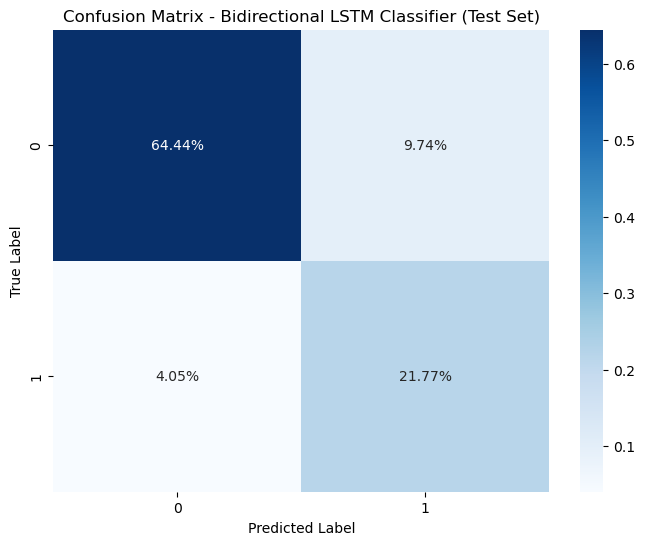

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step


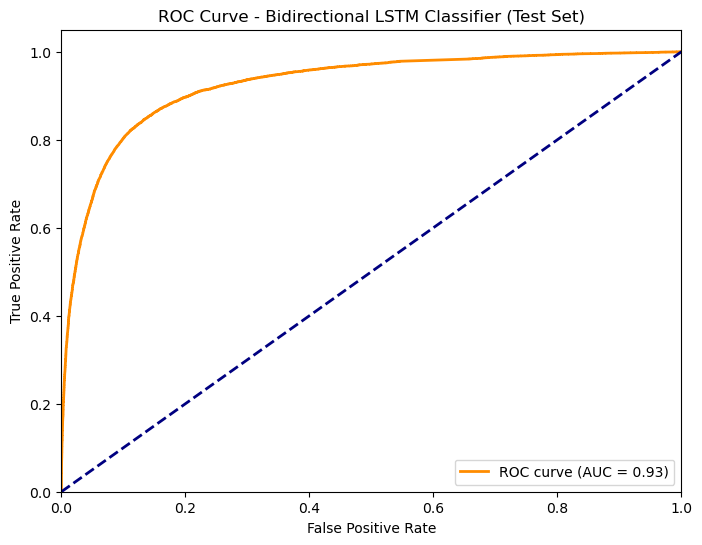

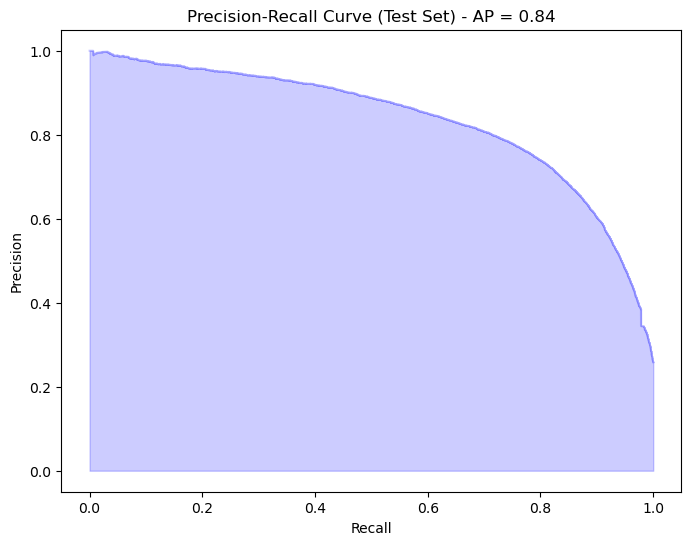


Final Results for Bidirectional LSTM Classifier:
Test Accuracy: 0.8621
ROC AUC: 0.9252
Average Precision (AP): 0.8357


In [8]:


# Reshape input data for the model
X_train_seq_balanced_flat = X_train_seq_balanced_flat.reshape((X_train_seq_balanced_flat.shape[0], X_train_seq_balanced_flat.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True), input_shape=(X_train_seq_balanced_flat.shape[1], X_train_seq_balanced_flat.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', 
              loss=binary_crossentropy, 
              metrics=['accuracy'])


model.summary()
# Train the model
history = model.fit(X_train_seq_balanced_flat, y_train_seq_balanced, epochs=10)


test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions and convert to binary
y_pred_test = model.predict(X_test_seq) 
y_pred_test = (y_pred_test > 0.5).astype(int) 


test_accuracy = accuracy_score(y_test_seq, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


print("\nClassification Report (Test Set):")
print(classification_report(y_test_seq, y_pred_test))


plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_seq, y_pred_test)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix - Bidirectional LSTM Classifier (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


y_pred_proba_test = model.predict(X_test_seq)  
fpr, tpr, thresholds = roc_curve(y_test_seq, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bidirectional LSTM Classifier (Test Set)')
plt.legend(loc="lower right")
plt.show()


precision, recall, thresholds_pr = precision_recall_curve(y_test_seq, y_pred_proba_test)
average_precision = average_precision_score(y_test_seq, y_pred_proba_test)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Test Set) - AP = {average_precision:.2f}')
plt.show()


print("\nFinal Results for Bidirectional LSTM Classifier:")
print("=================================================")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision (AP): {average_precision:.4f}")


